In [1]:
import numpy as np
import random 
np.random.seed(0)
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd

In [ ]:
#TODO IMPROVE RANDOM REAL POINT DATASET GENERATION
#TODO GENERATE LOTS OF FUNCTIONS AND STORE
#TODO IMPLEMENT NN
#TODO FIND SUP SUM FJ(XJ)
#TODO MAKE MORE RESOURCES
#



In [ ]:
# ATTEMPT: USE NN TO DECIDE WHICH 

In [3]:
class FunctionFactory():
    pass



In [2]:
points = {
    0.042965843749874444: 0.6533418670832937,
    0.3787241679877035: 0.3042738424990863,
    1.1705350036933195: 0.05716522954103642,
    2.1004721426233766: 0.6455891043076963,
    2.359753961469983: 0.9360699437627219,
    2.9785776318824864: 0.654009855945541,
    3.074667346643949: 0.6284206630265659,
    3.205316525888884: 0.7456934331540251,
    3.8666608914729816: 0.6740423292719581,
    4.7658323245717025: 0.6434653583075024
}

def generate_random_real_points( number_of_points, accumulate = False, negative_numbers = False ):
    x, y = [], []
    for i in range(number_of_points):
        x_incr, y_incr = random.random(), random.random(), 
        if len(x) == 0:
            x.append(x_incr)
            y.append(y_incr)
        else:
            x.append(x_incr+x[-1])
            if accumulate:
                y.append(y_incr+y[-1])
            else:
                y.append(y_incr)
    x = np.array(x)
    y = np.array(y)
    return  dict(zip(x, y)) 


# def generate_random_nondecreasing_function( number_of_points,  ):
#     x, y = [], []
#     for i in range(number_of_points):
#         x_incr, y_incr = random.random(), random.random(), 
#         if len(x) == 0:
#             x.append(x_incr)
#             y.append(y_incr)
#         else:
#             x.append(x_incr+x[-1])
#             y.append(y_incr+y[-1])
#     x = np.array(x)
#     y = np.array(y)
#     print(x)
#     print(y)
#     def final_funcion( x, y, t ):
#         assert x[0] <= t
#         assert x[-1] >= t
        
#     return final_funcion

def generate_random_convex_function( number_of_points ):
    return integral_function(generate_random_real_points( number_of_points, accumulate = False ))

def generate_several_rcf( number_of_functions, number_of_points ):
    return np.array([generate_random_convex_function( number_of_points ) for i in range(number_of_functions)])

def piecewise_linear_function(points):
    # Sort the dictionary by x values (keys)
    sorted_points = sorted(points.items())
    def final_function( t ):
    # If t is outside the range of x values, return the corresponding endpoint y value
        if t <= sorted_points[0][0]:
            return sorted_points[0][1]
        if t >= sorted_points[-1][0]:
            return sorted_points[-1][1]
        
        # Find the two points that enclose t
        for i in range(len(sorted_points) - 1):
            x1, y1 = sorted_points[i]
            x2, y2 = sorted_points[i+1]
            
            if x1 <= t <= x2:
                # Compute the y value using the equation of the line
                return (y2 - y1) / (x2 - x1) * (t - x1) + y1
    return final_function


def integral_function(points):
    # Sort the dictionary by x values (keys)
    sorted_points = sorted(points.items())
    
    def final_function( t ):
    # If t is outside the range of x values, return the accumulated value at the endpoints
        if t <= sorted_points[0][0]:
            return 0  # Assuming starting value is 0
        if t >= sorted_points[-1][0]:
            accumulated_value = 0
            for i in range(len(sorted_points) - 1):
                accumulated_value += sorted_points[i][1] * (sorted_points[i+1][0] - sorted_points[i][0])
            return accumulated_value
        
        # Compute the accumulated value of the function at t
        accumulated_value = 0
        for i in range(len(sorted_points) - 1):
            x1, y1 = sorted_points[i]
            x2, y2 = sorted_points[i+1]
            
            if x1 <= t <= x2:
                accumulated_value += y1 * (t - x1)
                return accumulated_value
            else:
                accumulated_value += y1 * (x2 - x1)
    return final_function

def plot_function( real_function ):

    x_values = np.linspace(-10, 10, 400)
    y_values = np.array([real_function(t) for t in x_values])

    # Plot the function
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, y_values, label="f(x) = real function", color='blue')
    plt.title("Plot of real_function")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)
    plt.legend()
    plt.show()





In [3]:
functions = generate_several_rcf(10, 50)
# for f in functions:
#     plot_function(f)
print(len(functions))

10


In [76]:
def evaluate_functions_at_points( functions, points ):
    try:
        ret = [functions[j](points[j]) for j in range(len(functions))]

        return ret
    except:
        try:
            # print(functions[0])
            # print(points[0][0])
            # print(functions[0](points[0][0]))
            ret = [functions[j](points[0][j]) for j in range(len(functions))]
            return ret
        except:
            print(f'counldnt evaluate fuctions {functions} at points {points}')


In [111]:
# Define the neural network
class Net(nn.Module):
    def __init__(self, num_functions):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(num_functions, 128)
        self.fc2 = nn.Linear(128, 128)
        # self.fc3 = nn.Linear(64, 128)
        self.fc4 = nn.Linear(128, num_functions)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))  
        # x = torch.relu(self.fc3(x))  
        x = torch.relu(self.fc4(x))  
        return x


# Loss function with penalty for constraint violation
def custom_loss(output, input, functions, N, print_bool):
    # evaluation = list(np.array(evaluate_functions_at_points( functions, output )) - np.array(evaluate_functions_at_points( functions, input )) )
    
    # evaluation = [x - y for x, y in evaluate_functions_at_points( functions, output ), evaluate_functions_at_points( functions, input )]
    evaluation = evaluate_functions_at_points( functions, output )
    for i in range(len(evaluation)):
        evaluation[i] = evaluation[i] - evaluate_functions_at_points( functions, input )[i]
    loss = 100 - sum(evaluation)
    if output.sum() > N:
        penalty = (output.sum() - N)**2
    else:
        penalty = (output.sum() - N)**2 - (output.sum() - N)**2
    if print_bool:
        print('evaluation', evaluation)
        print('loss', loss)
        print('penalty', penalty)
    return loss + penalty

def initialize_setting( number_of_functions, number_of_points, max_resource ):
    functions = generate_several_rcf( number_of_functions, number_of_points )
    N = max_resource
    return functions, N

functions, N = initialize_setting( 10, 50, 200 )


net = Net(len(functions))
optimizer = optim.Adam(net.parameters(), lr=0.0008)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

# Dummy input (can be your actual data or a tensor of ones for simplicity)
input_data = torch.ones(1, len(functions))
losses = [0, 1, 2]
constraint_violations = []

    # Training loop
def train( num_epochs, print_bool = False, plot_bool = False ):
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        output = net(input_data)
        # loss = custom_loss(output, input_data, functions, N)
        loss = custom_loss(output, input_data, functions, N, print_bool=False)
        loss.backward()
        optimizer.step()
        # scheduler.step()    
        # Log metrics
        if losses[-1] == losses[-2] and losses[-1] == losses[-3]:
            print('yea')
            break
        losses.append(loss.item())
        if output.sum() > N:
            constraint_violations.append(abs(output.sum().item() - N))
        else:
            constraint_violations.append(0)

    if plot_bool:
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(losses)
        plt.title("Loss over training")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.subplot(1, 2, 2)
        plt.plot(constraint_violations)
        plt.title("Constraint Violation over training")
        plt.xlabel("Epochs")
        plt.ylabel("Absolute difference from N")
        plt.tight_layout()
        plt.show()
    if print_bool:
        result = net(input_data)
        print(result)
        print(sum(sum(result)))
        print(evaluate_functions_at_points(functions, result))



yea


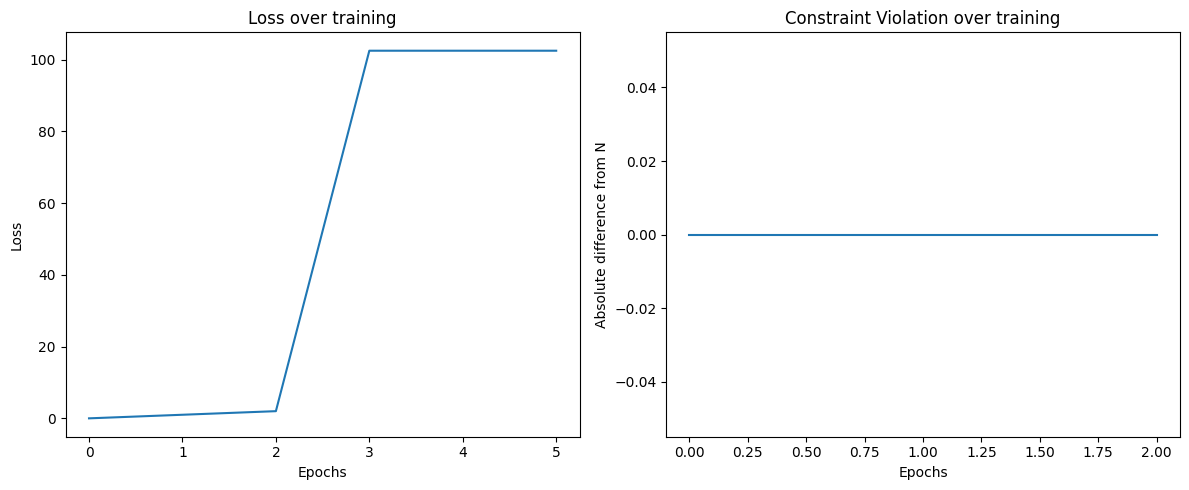

tensor([[0.0548, 0.0000, 0.0953, 0.0000, 0.1000, 0.1832, 0.0578, 0.0000, 0.0000,
         0.3283]], grad_fn=<ReluBackward0>)
tensor(0.8194, grad_fn=<AddBackward0>)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [115]:
train( 500, print_bool=True, plot_bool=True )

<function integral_function.<locals>.final_function at 0x7fe64045ae80>
tensor(0.0342, grad_fn=<SelectBackward0>)
0
evaluation [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
loss 100
penalty tensor(0., grad_fn=<SubBackward0>)
<function integral_function.<locals>.final_function at 0x7fe64045ae80>
tensor(0.0342, grad_fn=<SelectBackward0>)
0
evaluation [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
loss 100
penalty tensor(0., grad_fn=<SubBackward0>)
<function integral_function.<locals>.final_function at 0x7fe64045ae80>
tensor(0.0342, grad_fn=<SelectBackward0>)
0
evaluation [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
loss 100
penalty tensor(0., grad_fn=<SubBackward0>)
<function integral_function.<locals>.final_function at 0x7fe64045ae80>
tensor(0.0342, grad_fn=<SelectBackward0>)
0
evaluation [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
loss 100
penalty tensor(0., grad_fn=<SubBackward0>)
<function integral_function.<locals>.final_function at 0x7fe64045ae80>
tensor(0.0342, grad_fn=<SelectBackward0>)
0
evaluation [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
loss 10

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Setting up a simple neural network for DQN
class DQN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(DQN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )
    
    def forward(self, x):
        return self.network(x)

# Example sizes for our network
input_size = 10  # This should be the size of the state representation
hidden_size = 50  # This can be adjusted depending on the complexity of the problem
output_size = 3  # This should be the number of possible actions

# Instantiate the DQN
dqn = DQN(input_size, hidden_size, output_size)

# Use mean squared error loss function
criterion = nn.MSELoss()

# Use an Adam optimizer for training the neural network
optimizer = optim.Adam(dqn.parameters(), lr=0.001)

# Print the network architecture
# dqn

In [ ]:
class ProblemModel():
    pass

class Actuator():
    pass

class Decider():
    pass


